In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
from google.colab import files
import random

# Define a function for Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load the dataset
data = pd.read_excel('FMCG_Cleaned_With_Locations.xlsx')

# Data preprocessing
# Convert 'Period' to datetime format
data['Period'] = pd.to_datetime(data['Period'], format='%Y/%m')

# Sorting the data by period
data.sort_values('Period', inplace=True)

# Summing up the sales volume for each period
sales_data = data.groupby('Period').agg({'Volume': 'sum'}).reset_index()

# Splitting data into train and test sets
split_point = int(len(sales_data) * 0.8)
train, test = sales_data[:split_point], sales_data[split_point:]

# Model building: ARIMA Model
model = ARIMA(train['Volume'], order=(1,1,1))
model_fit = model.fit()

# Forecasting
forecast_result = model_fit.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # 95% confidence intervals

# Evaluate forecasts
mse = mean_squared_error(test['Volume'], forecast)
mae = mean_absolute_error(test['Volume'], forecast)
mape = mean_absolute_percentage_error(test['Volume'], forecast)

print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)

# Combine historical, forecast, and confidence intervals into a DataFrame
# Prepare train and test data series with NaN for alignment
train_series = train.copy().rename(columns={'Volume': 'Train Data'})
test_series = test.copy().rename(columns={'Volume': 'Test Data'})
train_series['Test Data'] = np.nan
test_series['Train Data'] = np.nan

# Combine all data into a single DataFrame
full_data = pd.concat([train_series, test_series]).sort_values('Period').reset_index(drop=True)

# Add forecast and confidence intervals to the DataFrame
full_data['Forecast'] = np.nan
full_data['Conf_Int_Lower'] = np.nan
full_data['Conf_Int_Upper'] = np.nan
full_data.loc[split_point:, 'Forecast'] = forecast.values
full_data.loc[split_point:, 'Conf_Int_Lower'] = conf_int.iloc[:, 0].values
full_data.loc[split_point:, 'Conf_Int_Upper'] = conf_int.iloc[:, 1].values

# Generate random locations
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
full_data['Location'] = [random.choice(cities) for _ in range(len(full_data))]

# Save to Excel
full_data.to_excel('FMCG_Forecast_With_Locations.xlsx', sheet_name='Forecast', index=False)

# Download the Excel file
files.download('FMCG_Forecast_With_Locations.xlsx')

# Plotting
fig = go.Figure()

# Adding actual historical data
fig.add_trace(go.Scatter(x=train['Period'], y=train['Volume'], mode='lines', name='Train Data'))
fig.add_trace(go.Scatter(x=test['Period'], y=test['Volume'], mode='lines', name='Test Data'))

# Adding forecast data
fig.add_trace(go.Scatter(x=test['Period'], y=forecast, mode='lines', name='Forecast'))

# Adding confidence intervals as shaded area
fig.add_trace(go.Scatter(
    x=test['Period'].tolist() + test['Period'].tolist()[::-1],  # x, then x reversed
    y=conf_int.iloc[:, 1].tolist() + conf_int.iloc[:, 0].tolist()[::-1],  # upper, then lower reversed
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Confidence Interval (95%)'
))

# Update layout of the plot
fig.update_layout(
    title='Sales Volume Forecast with Confidence Intervals',
    xaxis_title='Period',
    yaxis_title='Sales Volume',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error:  33158350247.258232
Mean Absolute Error:  146610.84006583225
Mean Absolute Percentage Error:  3.230292180812546


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import pandas as pd

# Create a DataFrame to display the error metrics in table form
error_metrics = {
    'Error Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Mean Absolute Percentage Error (MAPE)'],
    'Value': [mae, mse, mape]
}

error_metrics_df = pd.DataFrame(error_metrics)
error_metrics_df


,Error Metric,Value
0,Mean Absolute Error (MAE),1.466108e+05
1,Mean Squared Error (MSE),3.315835e+10
2,Mean Absolute Percentage Error (MAPE),3.230292e+00


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Error Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Error Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Error Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Error Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Error Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Error Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Error Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Error Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Value', y='Error Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

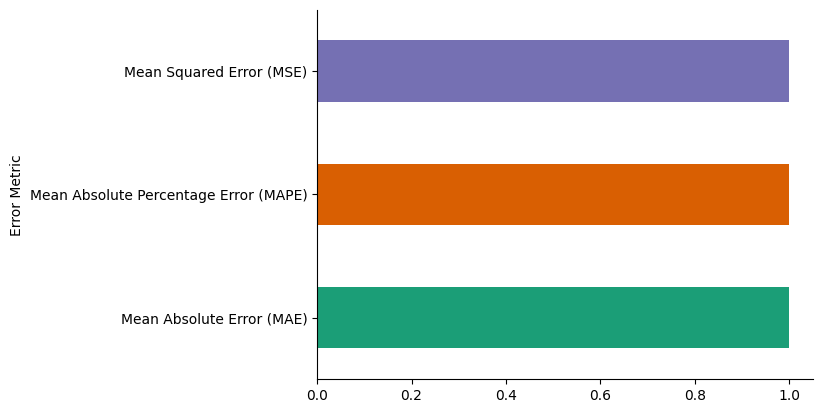

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Error Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

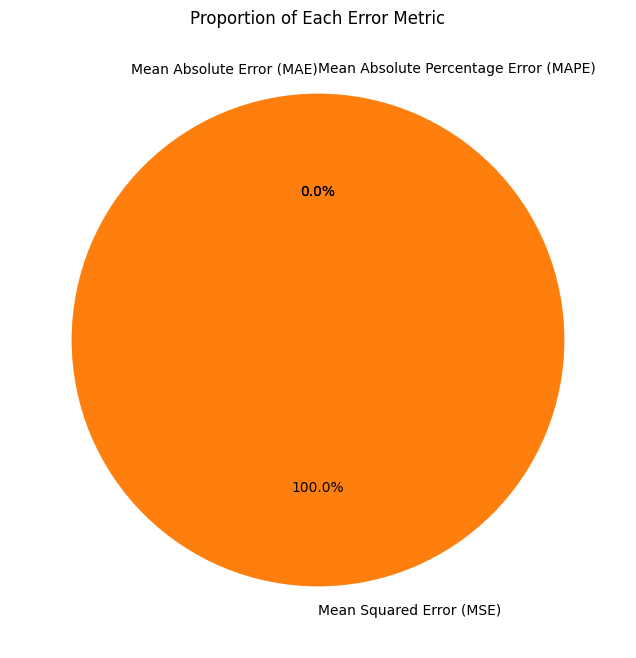

In [ ]:
# @title Comparison of Error Metrics

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(error_metrics_df['Value'], labels=error_metrics_df['Error Metric'], autopct='%1.1f%%', startangle=90)
_ = plt.title('Proportion of Each Error Metric')